In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("data/portland_housing.txt")
display(df.describe())

X = df[['Size']].values
y = df['Price'].values

# df = pd.read_csv("data/dane_1.csv")
# display(df.describe())

# X = df[['zmienna_1']].values
# y = df['target'].values


,Size,Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


### TrainTestSplit

In [18]:
def plot_stats(regressor, plot_charts=True):
    mse_train = mean_squared_error(y_train, regressor.predict(X_train), squared=False)
    print(f"MSE_train: {mse_train}")

    mse_test = mean_squared_error(y_test, regressor.predict(X_test), squared=False)
    print(f"MSE_test: {mse_test}")

    if plot_charts:
        x_lin = np.arange(X.min(), X.max(), 0.01).reshape(-1, 1)
        y_lin = regressor.predict(x_lin)
        plt.figure(figsize=(10, 7))
        plt.scatter(X_train, y_train, color='blue', s=100, alpha=0.5, label='train set')
        plt.scatter(X_train, regressor.predict(X_train), color='red', s=100, marker='*', label='train prediction')
        plt.plot(x_lin, y_lin, color='orange', label='prediction')

        plt.scatter(X_test, y_test, color='green', s=100, alpha=0.5, label='test set')
        plt.scatter(X_test, regressor.predict(X_test), color='purple', s=100, marker='x', label='test prediction')
        plt.legend()
        plt.show()
    return mse_train, mse_test

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

MSE_train: 0.0
MSE_test: 96172.8028087983


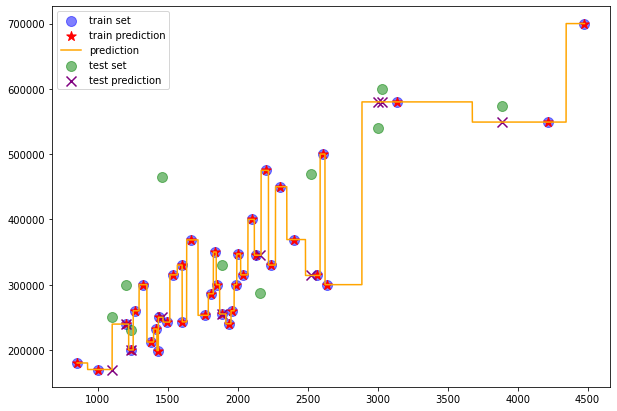

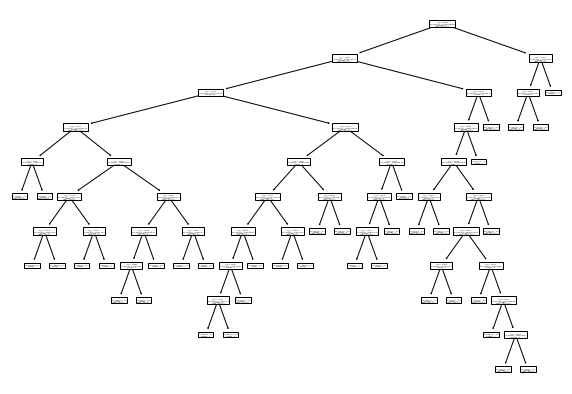

In [21]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error

dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)


plot_stats(dt_reg)


plt.figure(figsize=(10, 7))
plot_tree(dt_reg)
plt.show()

MSE_train: 49230.51480660862
MSE_test: 93412.44600400655


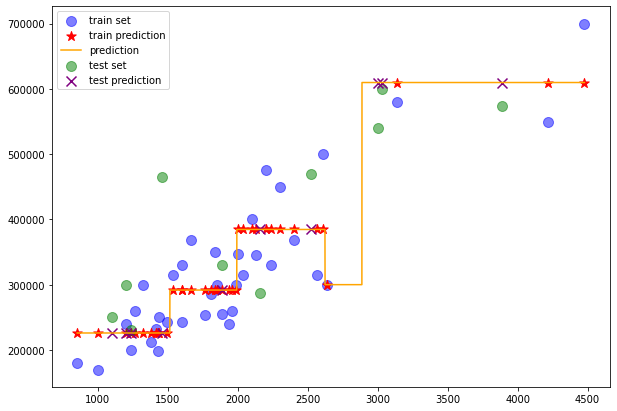

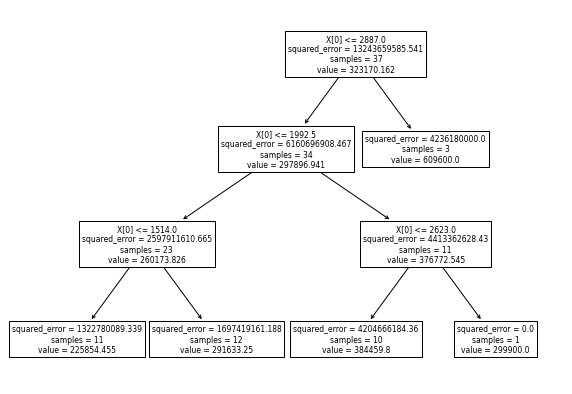

In [22]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error

dt_reg = DecisionTreeRegressor(max_depth=3, min_samples_split=4)
dt_reg.fit(X_train, y_train)

plot_stats(dt_reg)

plt.figure(figsize=(10, 7))
plot_tree(dt_reg)
plt.show()

MSE_train: 55985.12554793766
MSE_test: 91693.99686178938


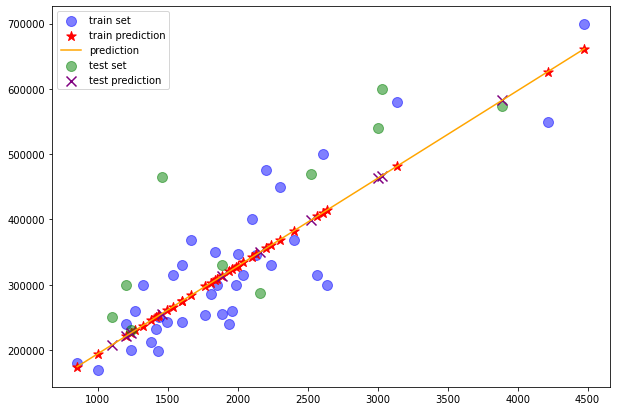

(55985.12554793766, 91693.99686178938)

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


plot_stats(lin_reg)

### KFold

In [24]:
from sklearn.model_selection import KFold

In [25]:
cv = KFold(n_splits=3, shuffle=True, random_state=42)
cv

KFold(n_splits=3, random_state=42, shuffle=True)

In [26]:
_split = cv.split(X, y)

MSE_train: 53421.90411599497
MSE_test: 91544.62125831356


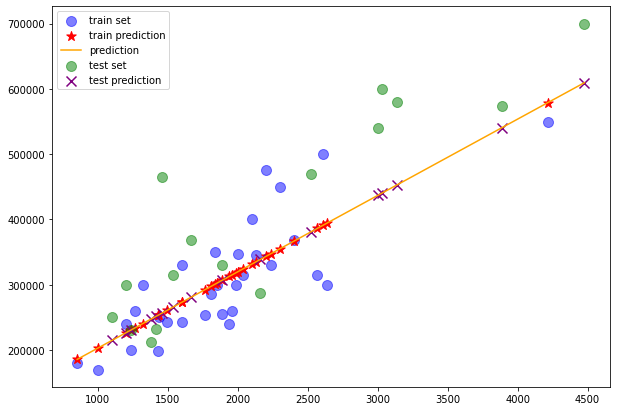

MSE_train: 70789.11689185139
MSE_test: 49494.154460786754


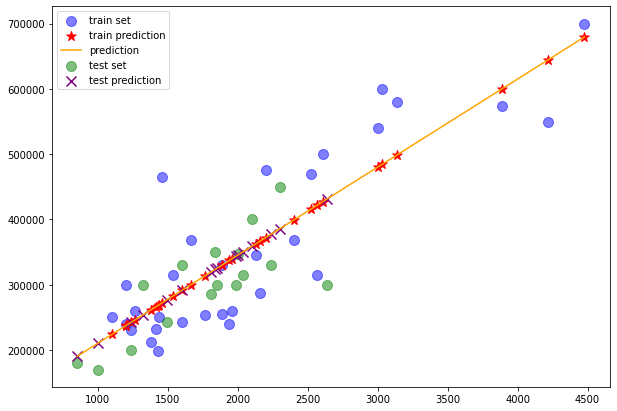

MSE_train: 61434.12522578358
MSE_test: 74281.06199345336


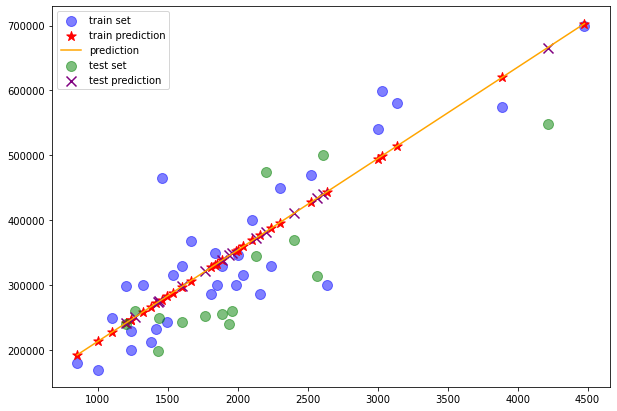

In [27]:
for n, (train, test) in enumerate(_split):
    X_train, y_train = X[train], y[train]
    X_test, y_test = X[test], y[test]
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    plot_stats(lin_reg)

In [28]:
cv = KFold(n_splits=10, shuffle=True, random_state=42)
_split = cv.split(X, y)

train_mse_list = []
test_mse_list = []

for n, (train, test) in enumerate(_split):
    X_train, y_train = X[train], y[train]
    X_test, y_test = X[test], y[test]
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    train_mse, test_mse = plot_stats(lin_reg, plot_charts=False)
    train_mse_list.append(train_mse)
    test_mse_list.append(test_mse)

MSE_train: 57390.79675592201
MSE_test: 107595.02731651968
MSE_train: 63926.745718479724
MSE_test: 69707.68012571736
MSE_train: 64652.69841523721
MSE_test: 61132.11572883241
MSE_train: 66320.32968553239
MSE_test: 44762.21162442723
MSE_train: 63795.21407180015
MSE_test: 68022.29826098379
MSE_train: 67025.85609916829
MSE_test: 31491.137181304603
MSE_train: 66134.82201108568
MSE_test: 44931.898345477115
MSE_train: 63970.154280163355
MSE_test: 68579.99092147042
MSE_train: 64657.1997356676
MSE_test: 59306.94925065472
MSE_train: 61037.21960921382
MSE_test: 96040.24130426788


In [32]:
print(f"Mean train mse: {np.mean(train_mse_list)}\t std: {np.std(train_mse_list)}")
print(f"Mean test mse: {np.mean(test_mse_list)}\t std: {np.std(test_mse_list)}")

Mean train mse: 63891.103638227025	 std: 2689.690910455956
Mean test mse: 65156.95500596552	 std: 21918.511543551802


### LeaveOneOut 

In [12]:
from sklearn.model_selection import LeaveOneOut

In [13]:
cv = LeaveOneOut()
cv

LeaveOneOut()

In [14]:
_split = cv.split(X, y)
_split

<generator object BaseCrossValidator.split at 0x7ff7537a22e0>

MSE_train: 64494.726189755514
MSE_test: 46596.846325631894


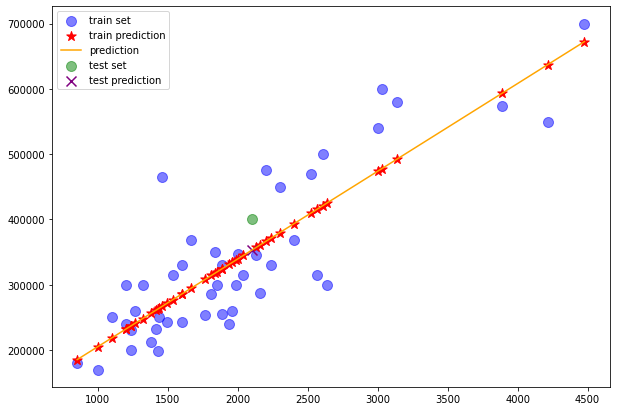

MSE_train: 64526.70818759076
MSE_test: 44584.02586303069


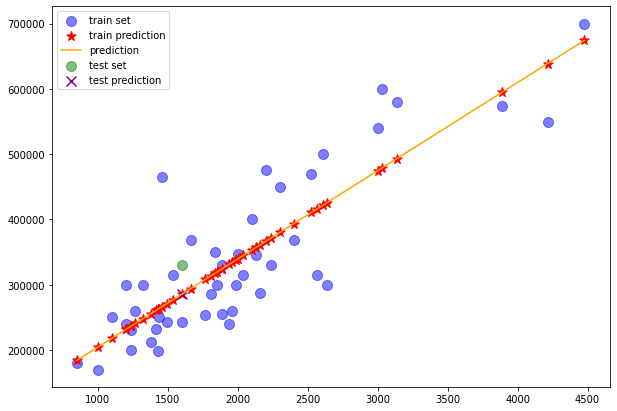

MSE_train: 64742.891499890036
MSE_test: 25822.326471114706


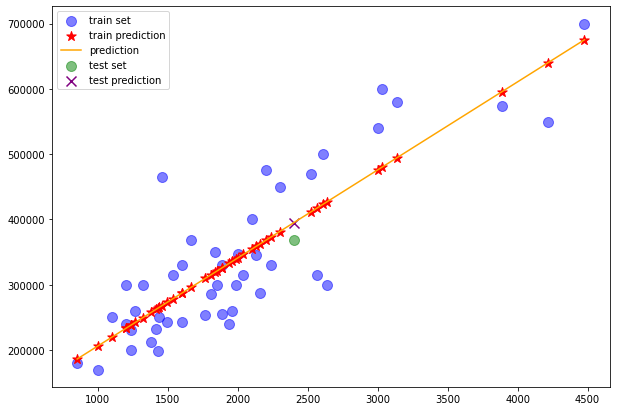

In [15]:
for n, (train, test) in enumerate(_split):
    if n < 3:
        X_train, y_train = X[train], y[train]
        X_test, y_test = X[test], y[test]
        lin_reg = LinearRegression()
        lin_reg.fit(X_train, y_train)
        plot_stats(lin_reg)

In [34]:
cv = LeaveOneOut()
_split = cv.split(X, y)

train_mse_list = []
test_mse_list = []

for n, (train, test) in enumerate(_split):
    X_train, y_train = X[train], y[train]
    X_test, y_test = X[test], y[test]
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    train_mse, test_mse = plot_stats(lin_reg, plot_charts=False)
    train_mse_list.append(train_mse)
    test_mse_list.append(test_mse)

MSE_train: 64494.726189755514
MSE_test: 46596.846325631894
MSE_train: 64526.70818759076
MSE_test: 44584.02586303069
MSE_train: 64742.891499890036
MSE_test: 25822.326471114706
MSE_train: 64698.07119070871
MSE_test: 30775.22836612619
MSE_train: 64096.24316812693
MSE_test: 68887.32802562072
MSE_train: 64598.69407429208
MSE_test: 39238.37982990604
MSE_train: 64611.62370149469
MSE_test: 38371.80136482138
MSE_train: 64132.79926128596
MSE_test: 66404.19572873227
MSE_train: 64500.57590077448
MSE_test: 46522.14337648984
MSE_train: 64698.60847310237
MSE_test: 30675.005325887527
MSE_train: 63377.43799532313
MSE_test: 94268.205301182
MSE_train: 64844.11067820501
MSE_test: 6824.126398365945
MSE_train: 64848.31821868552
MSE_test: 4574.982980697881
MSE_train: 64701.376896148846
MSE_test: 34170.92393125966
MSE_train: 64794.84889114033
MSE_test: 18798.78721879635
MSE_train: 64023.30464021907
MSE_test: 70949.71702476224
MSE_train: 64396.35451579314
MSE_test: 53030.182134320115
MSE_train: 64603.509737716

In [35]:
print(f"Mean train mse: {np.mean(train_mse_list)}\t std: {np.std(train_mse_list)}")
print(f"Mean test mse: {np.mean(test_mse_list)}\t std: {np.std(test_mse_list)}")

Mean train mse: 64116.58145552733	 std: 1159.2001366466059
Mean test mse: 54376.32351777177	 std: 39276.29355843252


In [36]:
from sklearn.model_selection import cross_val_score

lin_model_cv = LinearRegression()

scores = cross_val_score(lin_model_cv, X, y,
                         scoring="neg_mean_squared_error", cv=10)
scores = np.sqrt(-scores)
scores

array([ 45807.13599392,  47516.22096115,  44647.8048386 ,  84974.97861019,
        62793.81493116, 123531.02216259,  50941.97752493,  56281.36614068,
        79423.41495547,  36135.15274906])